# Plot bar char with labels

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Topic_Survey_Assignment.csv',index_col=0)

In [4]:
df.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [5]:
df.shape

(6, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Big Data (Spark / Hadoop) to Machine Learning
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Very interested      6 non-null      int64
 1   Somewhat interested  6 non-null      int64
 2   Not interested       6 non-null      int64
dtypes: int64(3)
memory usage: 192.0+ bytes


In [8]:
df_bar = df.copy()
df_bar['Very interested'] = (df['Very interested'] / 2233).round(2)
df_bar['Somewhat interested'] = (df['Somewhat interested'] / 2233).round(2)
df_bar['Not interested'] = (df['Not interested'] / 2233).round(2)

In [9]:
df_bar.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),0.60,0.33,0.06
Data Analysis / Statistics,0.76,0.20,0.03
Data Journalism,0.19,0.48,0.27
Data Visualization,0.60,0.33,0.05
Deep Learning,0.57,0.34,0.06
Machine Learning,0.73,0.21,0.03


In [10]:
df_bar.index

Index(['Big Data (Spark / Hadoop)', 'Data Analysis / Statistics',
       'Data Journalism', 'Data Visualization', 'Deep Learning',
       'Machine Learning'],
      dtype='object')

In [11]:
df_bar.columns

Index(['Very interested', 'Somewhat interested', 'Not interested'], dtype='object')

# Create Funtion to plot labels

In [12]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """     
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Plot bar chart with label

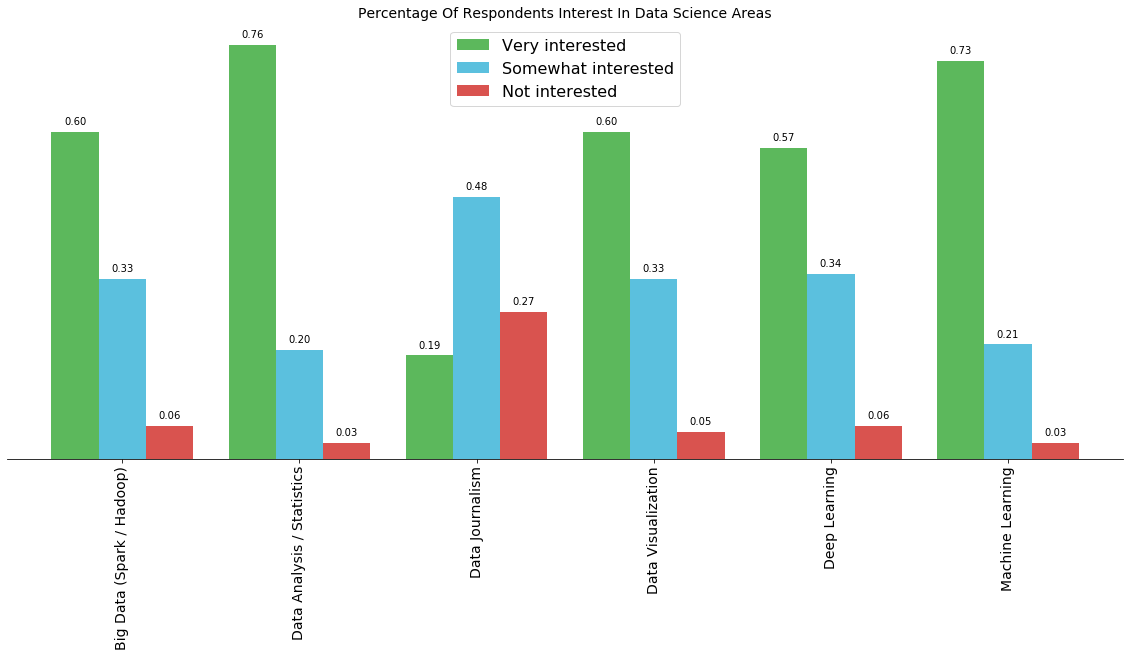

In [13]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

xs = df_bar.index
ys = df_bar[['Very interested', 'Somewhat interested', 'Not interested']]

colors=['#5cb85c', '#5bc0de', '#d9534f']
ax = df_bar.plot(kind='bar', figsize=(20, 8), color=colors,  width=0.8)
plt.xticks(fontsize=14)
plt.legend(prop={'size': 16})
plt.yticks([])
#plt.gca().spines["top"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title('Percentage Of Respondents Interest In Data Science Areas', size=14) # add title to the plot


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.show()